## Quick Glance at the Data

In [22]:
import os
print(os.getcwd())


c:\Users\nirul\repos\Housing-End-to-End\notebooks


In [23]:
import pandas as pd
import numpy as np

data = pd.read_csv("..\\dataset\\housing.csv")
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We see that there are 10 attributes in total. All of them are numerical except for `ocean_proximity`

In [25]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

The `ocean_proximity` column has 5 unique categories

In [26]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This gives us a summary of the dataset's numerical variables. It gives us information regarding the min, max and standard deviation of the attributes. The percentiles indicate that for instance, 25% of the total houses have a `median_house_value` of $119,600 (in tens of thousands of dollars).

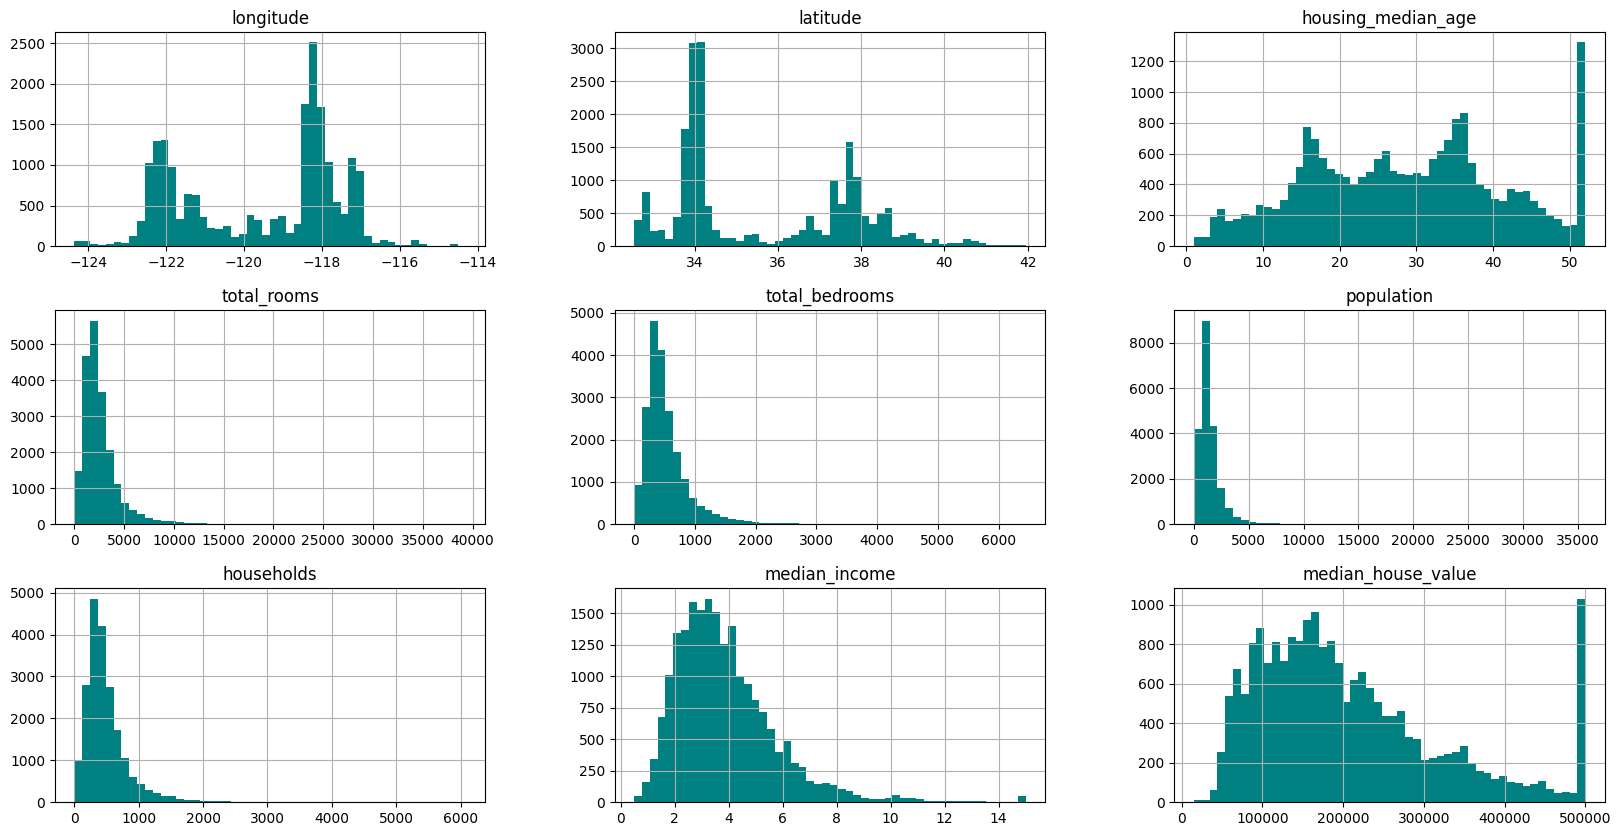

In [27]:
import matplotlib.pyplot as plt

data.hist(bins=50, color='teal', figsize=(20,10))
plt.show()

We see that many histograms are tail heavy which could be indicative of outliers. We will fix this later on.

For the dataset to be representative of the housing population, we need to make sure the `median_income` variable is <u>stratified sampled</u>. To go about this , we start by creating bins / intervals of the continuous variable. Inother words, by categorizing the different income levels. Then we apply stratified sampling which is basically keeping the same distribution of a particular category constant in every sample. 

Imagine you have a dataset of customers with a column `income_cat` that divides customers into 5 income categories (1: low income, 5: high income). If category 5 represents only 10% of the dataset, simple random sampling could accidentally exclude many category-5 samples, making the test or train set unrepresentative of the original data.

<b>Stratified sampling</b> ensures that if 10% of the dataset is category 5, then 10% of both the training and testing sets will also belong to category 5.

<Axes: >

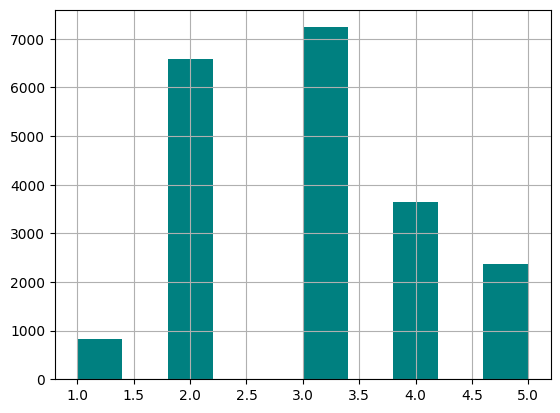

In [28]:
data["income_cat"] = pd.cut(data["median_income"],
   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
   labels=[1, 2, 3, 4, 5])

data["income_cat"].hist(color='teal')

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(data, data["income_cat"]):
   strat_train_set = data.loc[train_index]   
   strat_test_set = data.loc[test_index]

This performs a stratified split of the housing dataset, ensuring the training and testing sets maintain the same proportion of the income_cat feature as in the original dataset. The splitter is configured to create one split (n_splits=1) with 20% of the data allocated to the test set (test_size=0.2), ensuring reproducibility with random_state=42. The split.split() method divides the dataset into train and test indices based on the `income_cat column` preserving the distribution in both sets for unbiased model training and evaluation.

In [31]:
for set_ in (strat_train_set, strat_test_set):
   set_.drop("income_cat", axis=1, inplace=True)

The `income_cat` column was solely created to copy the distribution of the `median_income` from original dataset onto the tarin and test datasets. Since we have already captured that proportion in the train and test sets, we do not need this column anymore.

## Data Viz to Gain Insights

First, keep the testing set aside so we can explore the data. We will just make a copy of the training set to do this.

In [32]:
housing = strat_train_set.copy()

#### Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

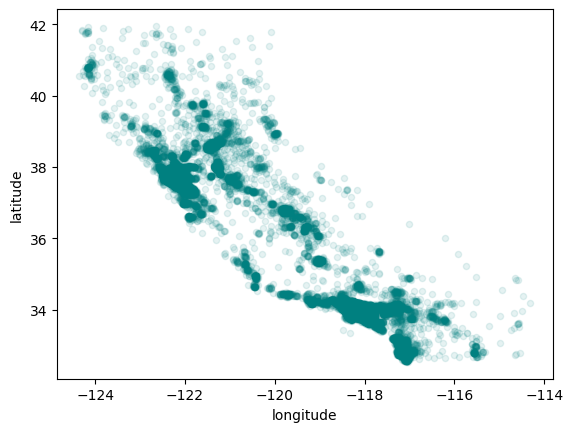

In [33]:
housing.plot(kind='scatter',x='longitude',y='latitude',color='teal',alpha=0.1)

This highlights high-density areas (according to count) using the alpha parameter.

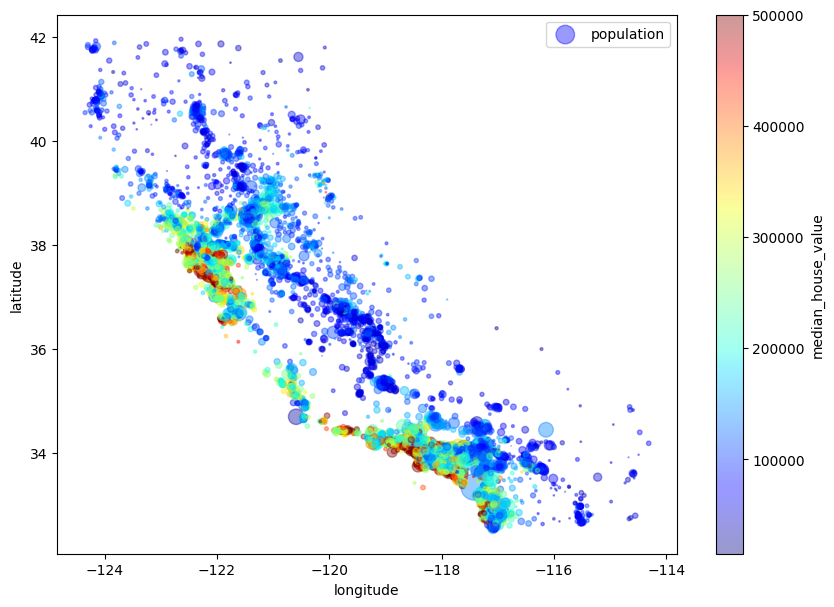

In [34]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha=0.4, s = housing["population"]/100, label = "population", figsize= (10,7), c = "median_house_value", cmap = "jet")
plt.legend()
plt.show()

The red indicates highly expensive housing situations and blue denotes cheap housing situations.

In [35]:
## ADVANCED MAPPING TO ACTUAL GEOGRAPHY

import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[housing["latitude"].mean(), housing["longitude"].mean()], zoom_start=6)

# Add points to the map
marker_cluster = MarkerCluster().add_to(m)

for _, row in housing.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=row["population"] / 1000,  # Scale population for visualization
        color=None,
        fill=True,
        fill_color=plt.cm.jet(row["median_house_value"] / housing["median_house_value"].max()),
        fill_opacity=0.5,
        tooltip=f"House Value: {row['median_house_value']}"
    ).add_to(marker_cluster)

# Display the map
m; # output is being suppressed using a semicolon


In [36]:
import sys
print(sys.executable)


c:\Users\nirul\miniconda3\python.exe


#### Correlations

In [37]:
housing_numeric = housing.select_dtypes(include=["number"])
housing_numeric.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


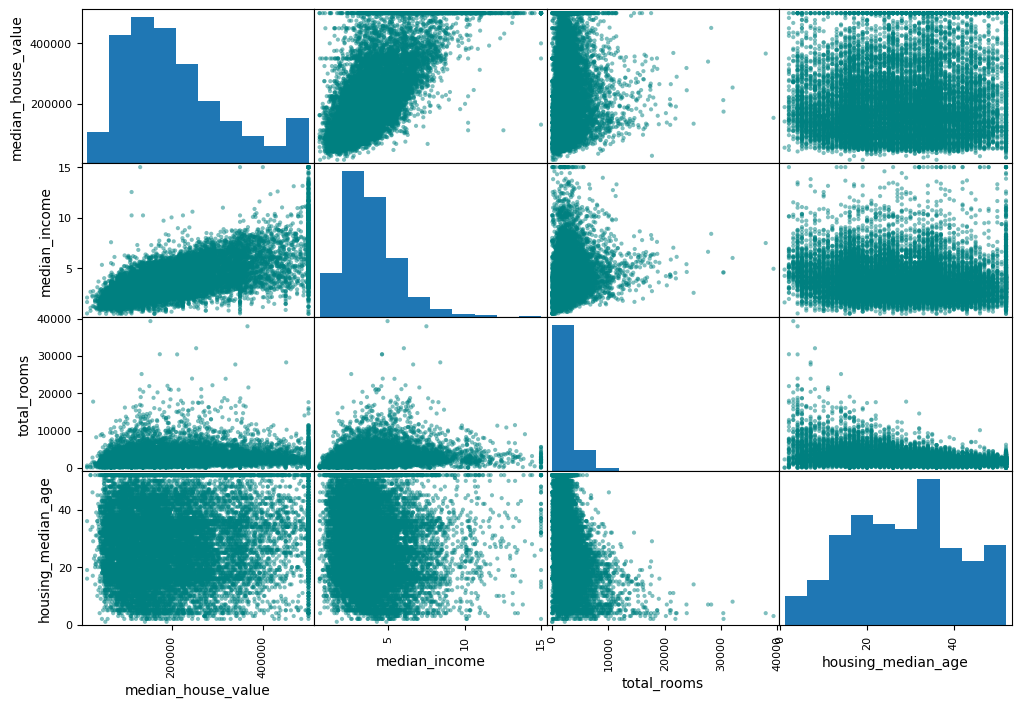

In [38]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",   "housing_median_age"] 
scatter_matrix(housing[attributes],color='teal', figsize=(12, 8))
plt.show()

we see that the variable that directly correlates positively with `median_house_value` is `median_income`.

Now to get more insights on the other variables, we need to make sense of them. Some variables such as `total_bedrooms` dont make much sense unlesss we know how many bedrooms in one household.
Similarly, we can make a few tweaks on a few other variables such as -

In [39]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"]

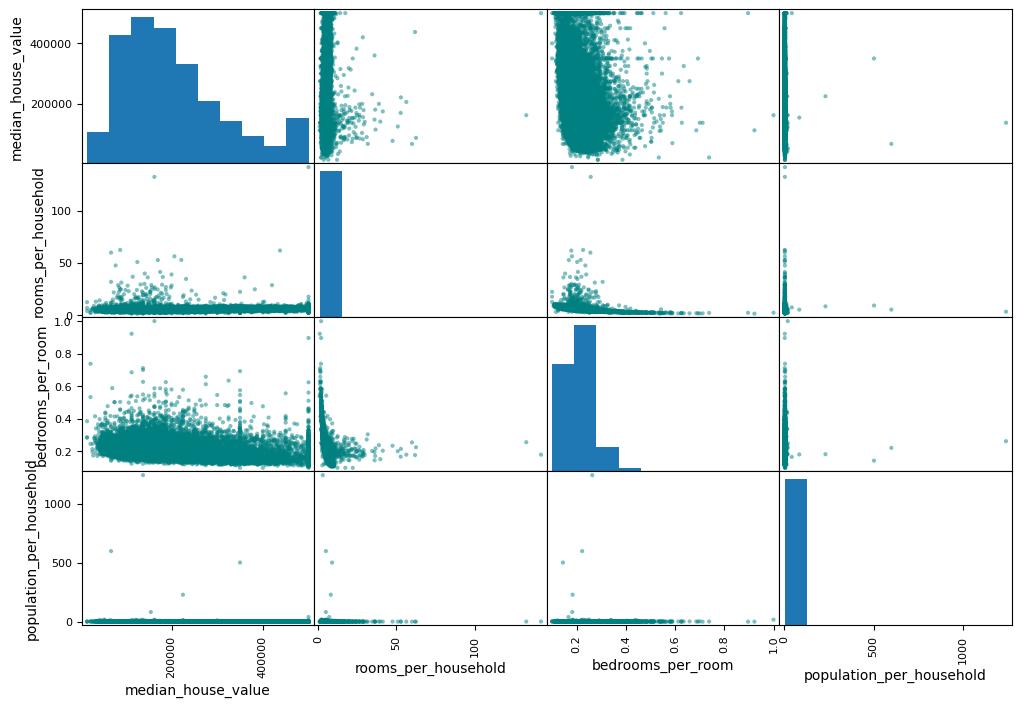

In [40]:
new_attributes = ["median_house_value", "rooms_per_household", "bedrooms_per_room",   "population_per_household"] 
scatter_matrix(housing[new_attributes],color='teal', figsize=(12, 8))
plt.show()

In [41]:
corr_matrix = housing.select_dtypes(include=["number"]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

We see that households with less bedroom to room ratio are more expensive compared to those with more bedroom to total room.

In [42]:
housing.head()

# Save as a CSV file
housing.to_csv('..\\dataset\\modified_housing.csv', index=False)
